# Evaluating the cost function

In [16]:
from qiskit.circuit.library import TwoLocal
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session
from qiskit.quantum_info import SparsePauliOp
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

In [2]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

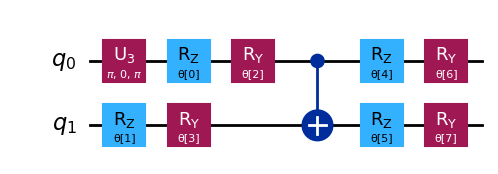

In [24]:

# Add your token below
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy( operational=True, simulator=True)

session = Session(backend=backend, )

# backend = AerSimulator()


# In this cell we are building the reference state and building variation form (parameterising the input)

observable = SparsePauliOp.from_list([("XX", 1), ("YY", -3)])

reference_circuit = QuantumCircuit(2)
reference_circuit.x(0)

variational_form = TwoLocal(
    2,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
)
ansatz = transpile(reference_circuit.compose(variational_form), backend = backend)

ansatz.decompose().draw('mpl')


# Use estimator to get the expected values corresponding to each ansatz
estimator = Estimator(session=session)

theta_list = (2 * np.pi * np.random.rand(1, 8)).tolist()


cost = cost_func_vqe(theta_list, ansatz, observable, estimator)

# Close session after done
session.close()

print(cost)

qiskit_runtime_service.__init__:INFO:2024-04-01 12:22:39,587: Default instance: ibm-q/open/main
base_primitive._run_primitive:INFO:2024-04-01 12:22:52,520: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 1}}, 'resilience': {'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING'}, 'simulator': {'noise_model': Unset, 'seed_simulator': Unset, 'coupling_map': Unset, 'basis_gates': Unset}}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators will be deprecated on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


-0.948
